<a href="https://colab.research.google.com/github/BachokunIAR/pytorch/blob/main/Pytorch_Credit_card_Fraud_detection_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
upload = files.upload()

Saving creditcard_2023.csv to creditcard_2023.csv


In [4]:
!ls

creditcard_2023.csv  sample_data


In [5]:
data = pd.read_csv('creditcard_2023.csv')
pd.set_option('display.max_columns',None)
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [6]:
num_col = list(data.describe().columns)
col_categorical = list(set(data.columns).difference(num_col))
remove_list = []
col_numerical = [ e for e in num_col if e not in remove_list]

In [7]:
categorical_col = []
for k, v in data.items():
    if v.dtype =='object':
        categorical_col.append(k)

print(categorical_col)

[]


Cool!! that is a perfect data, no worry about cob=ncerting categorical data!

In [8]:
# Here we drop the id since it obviously has no influence on our model

data1 = data.drop(['id'],axis = 1)

In [9]:
data1.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.98702,0.293438,-0.941386,0.54902,1.804879,0.215598,0.512307,0.333644,0.12427,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.12628,-0.434824,-0.08123,-0.151045,17982.1,0


Beatiful!!

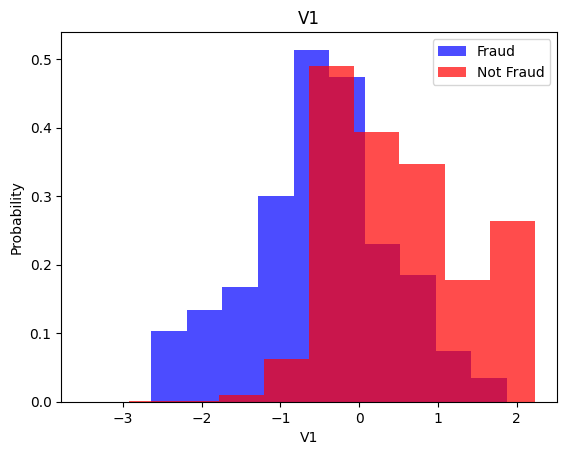

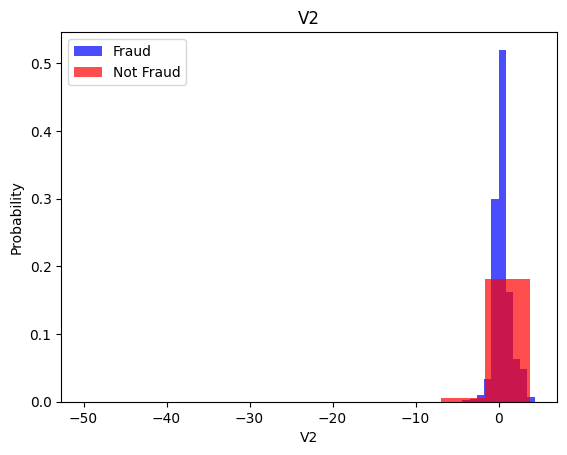

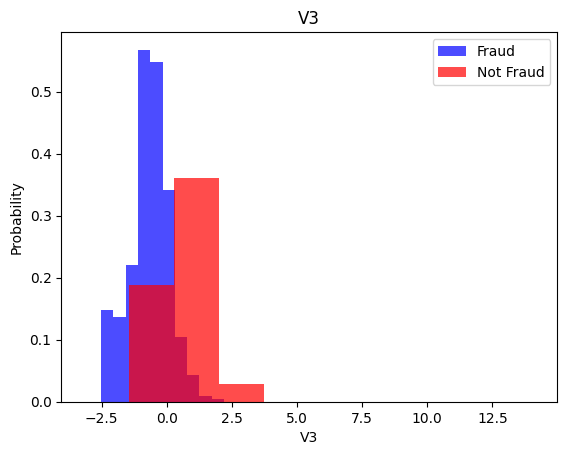

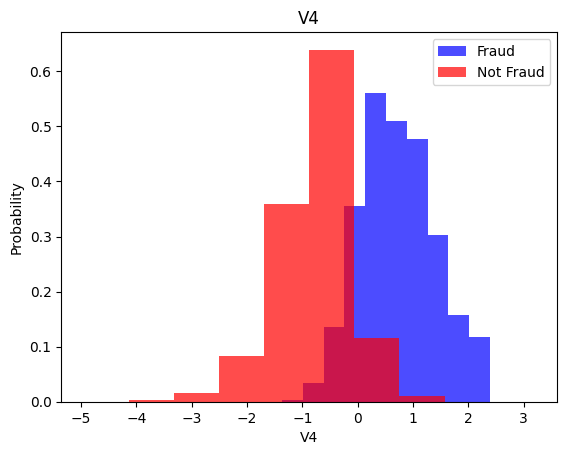

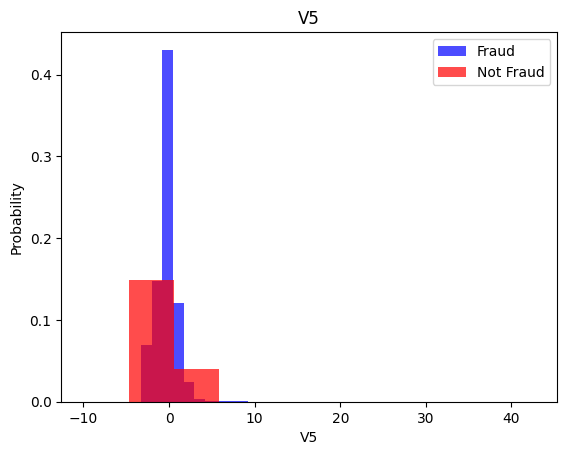

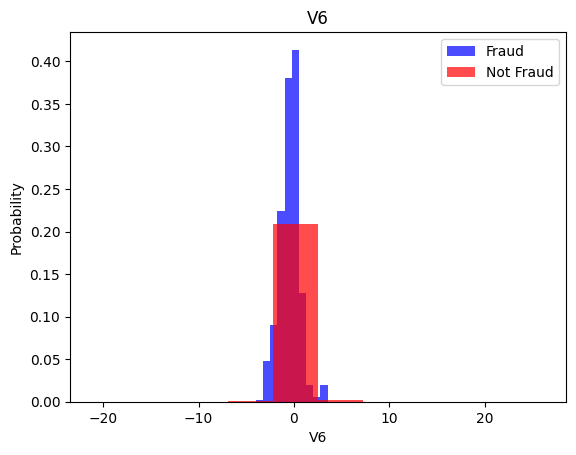

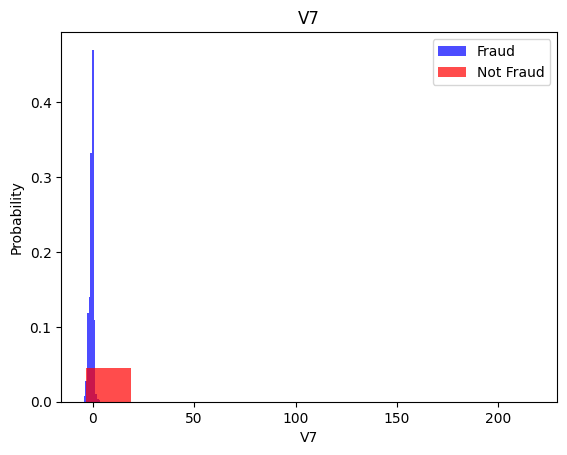

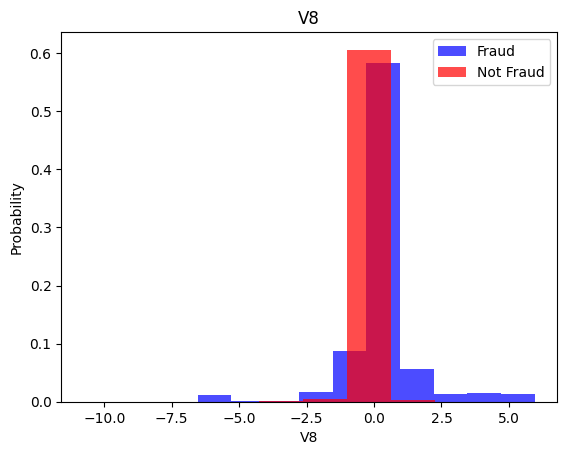

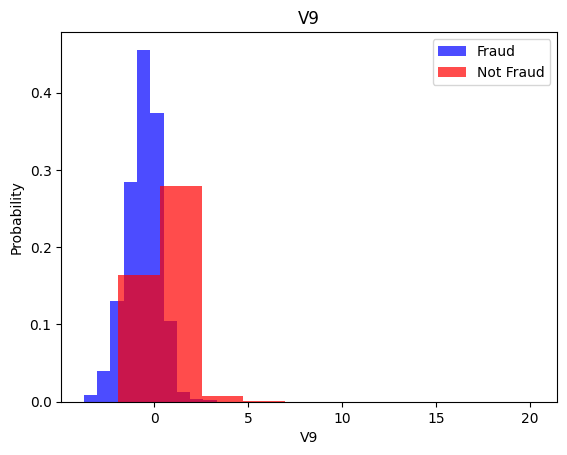

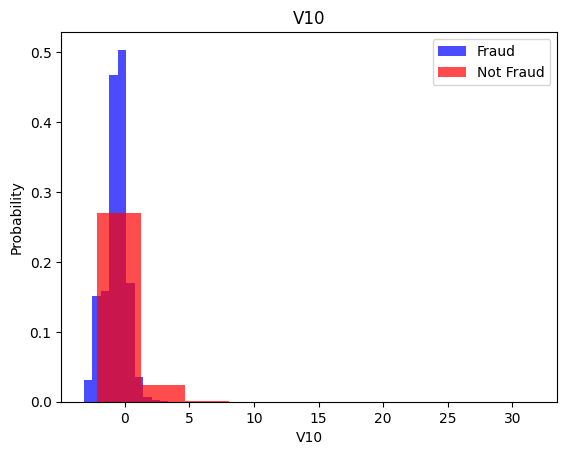

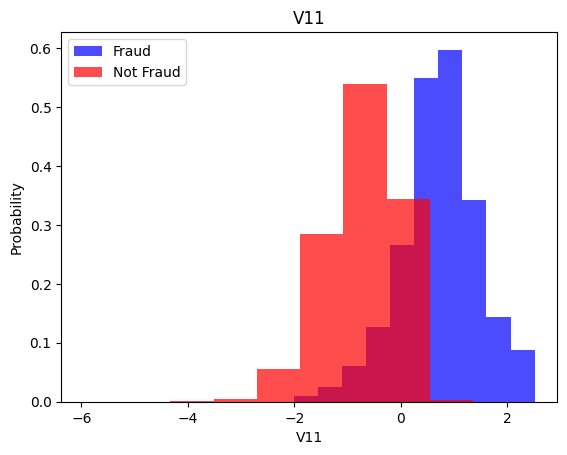

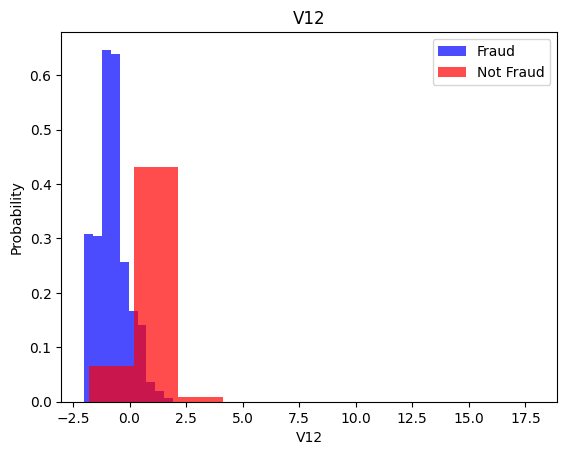

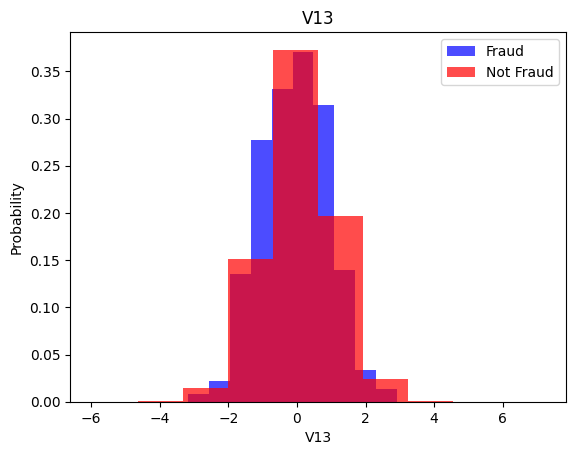

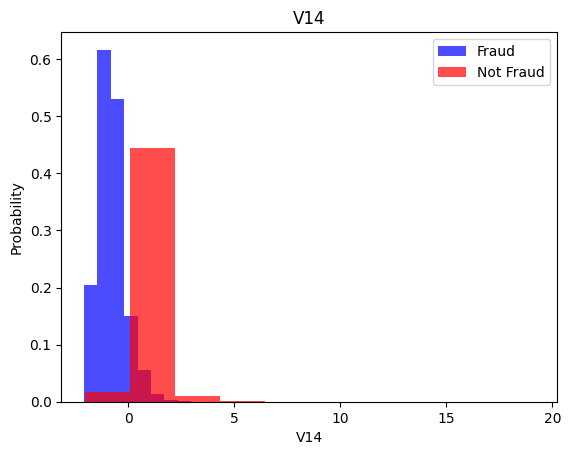

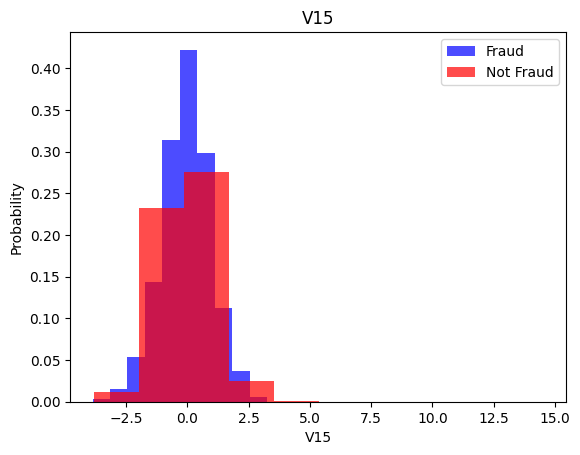

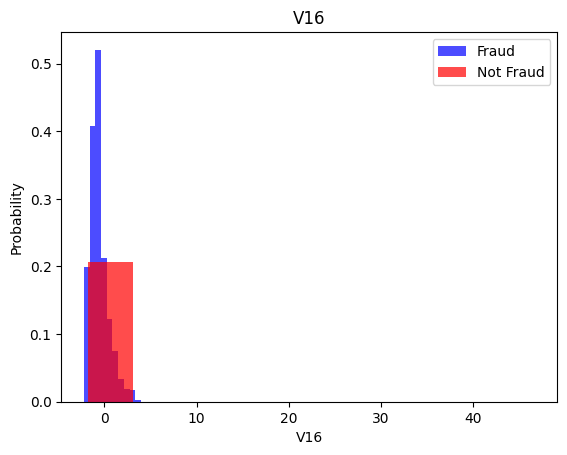

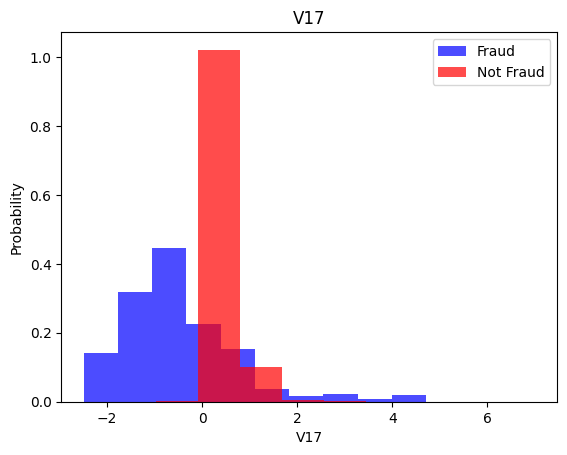

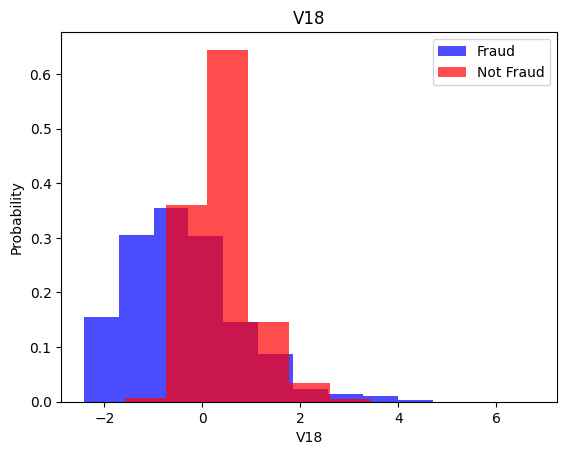

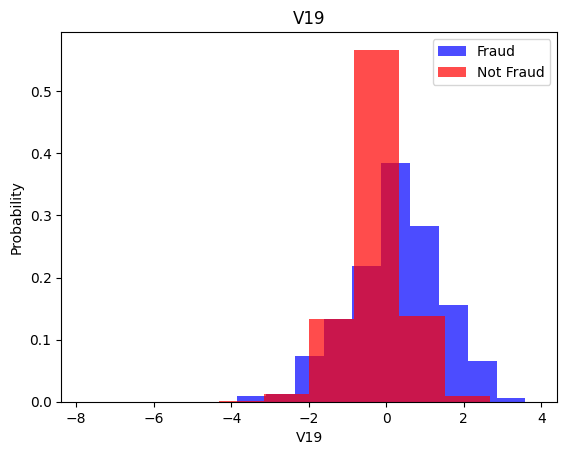

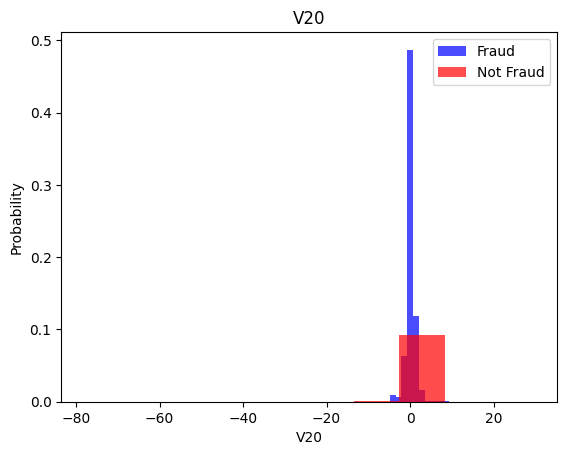

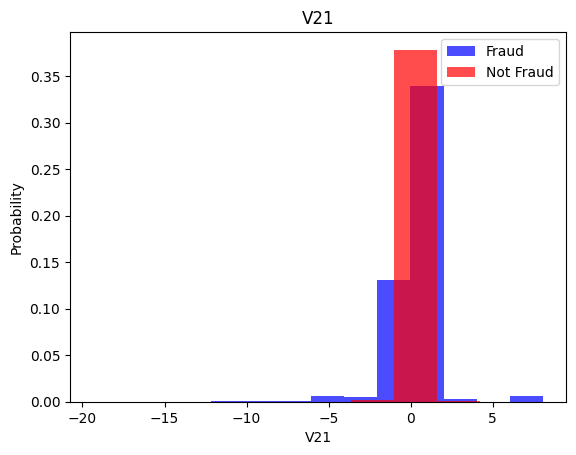

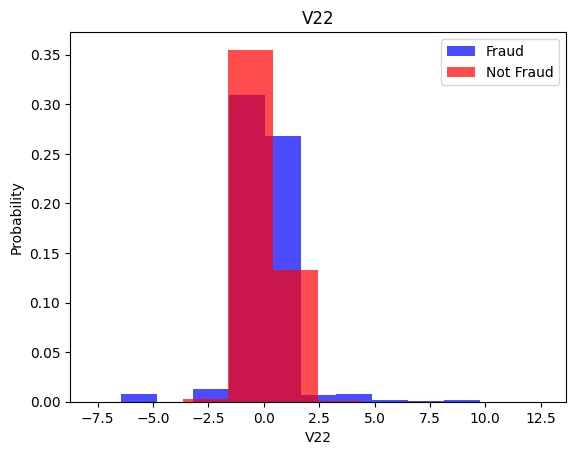

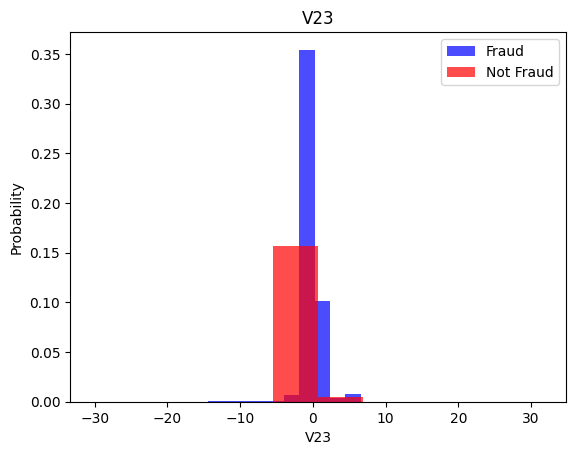

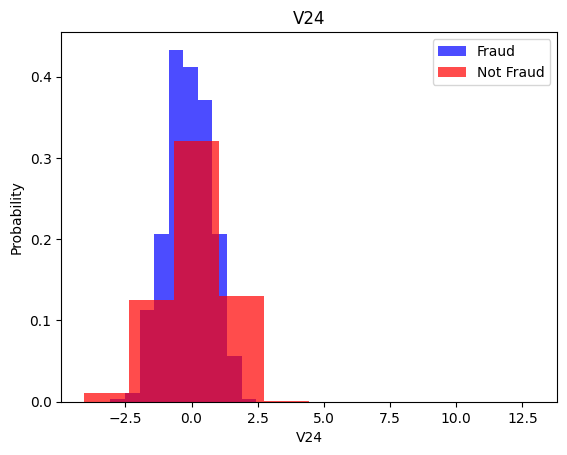

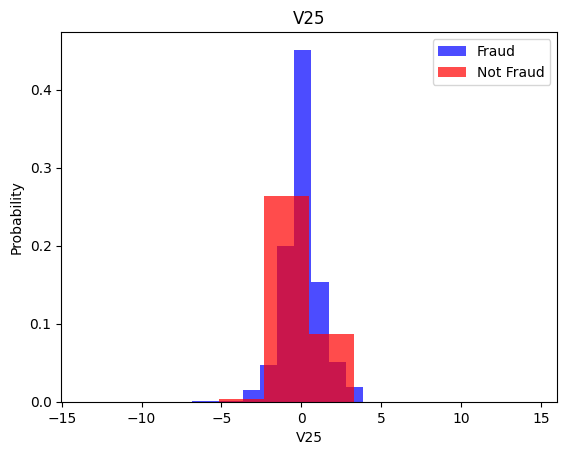

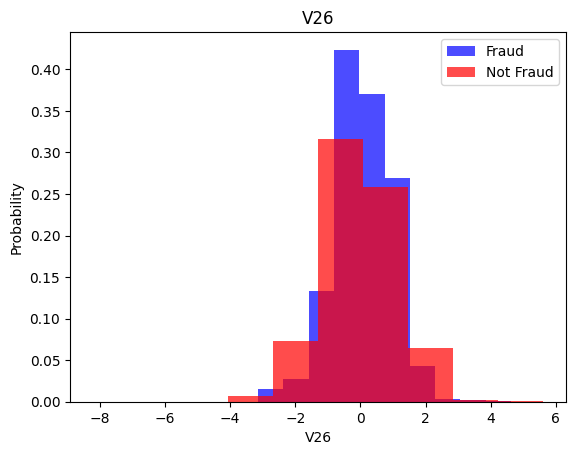

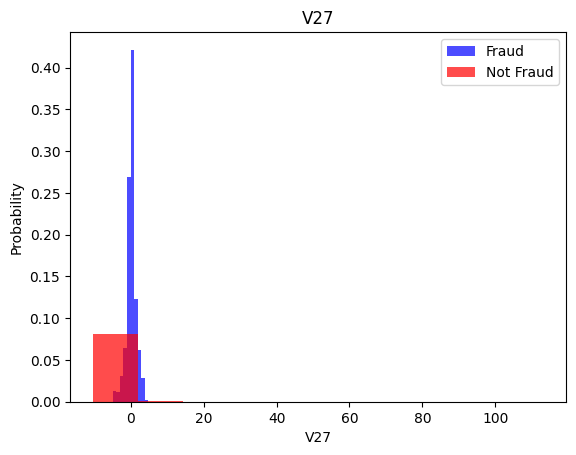

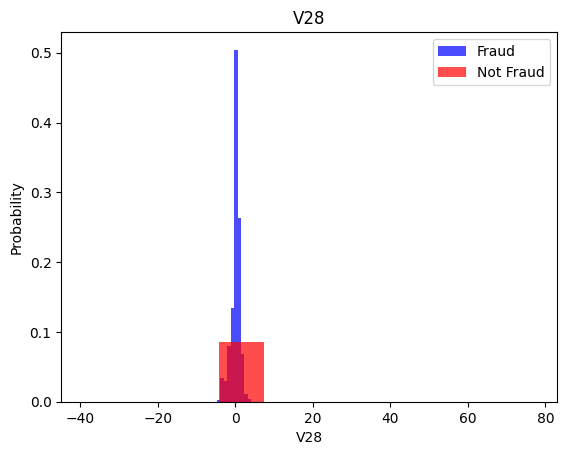

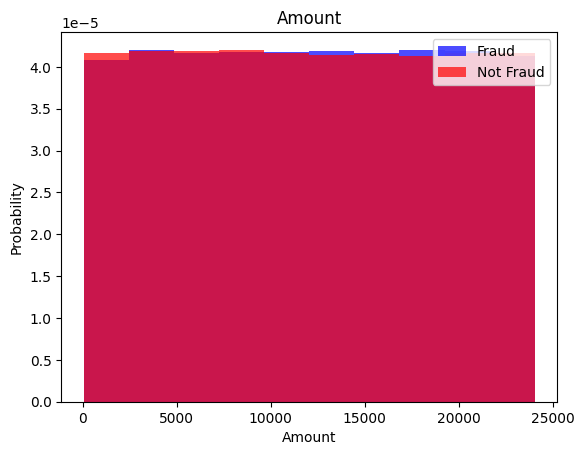

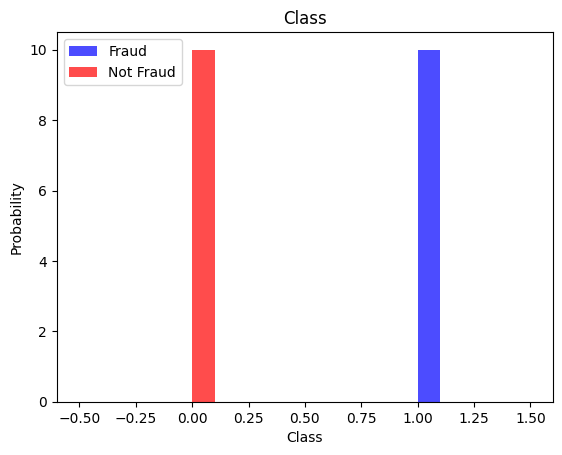

In [10]:
for label in data1[:-1] :
    plt.hist(data1[data1["Class"]==1][label], color ='blue', label = 'Fraud', alpha=0.7, density= True)
    plt.hist(data1[data1["Class"]==0][label], color ='red',label = 'Not Fraud', alpha=0.7, density= True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    #plt.figure(figsize=(12, 6))
    #plt.subplot(1, 2, 1)
    plt.legend()
    plt.show() # This gives us a fair idear of the data

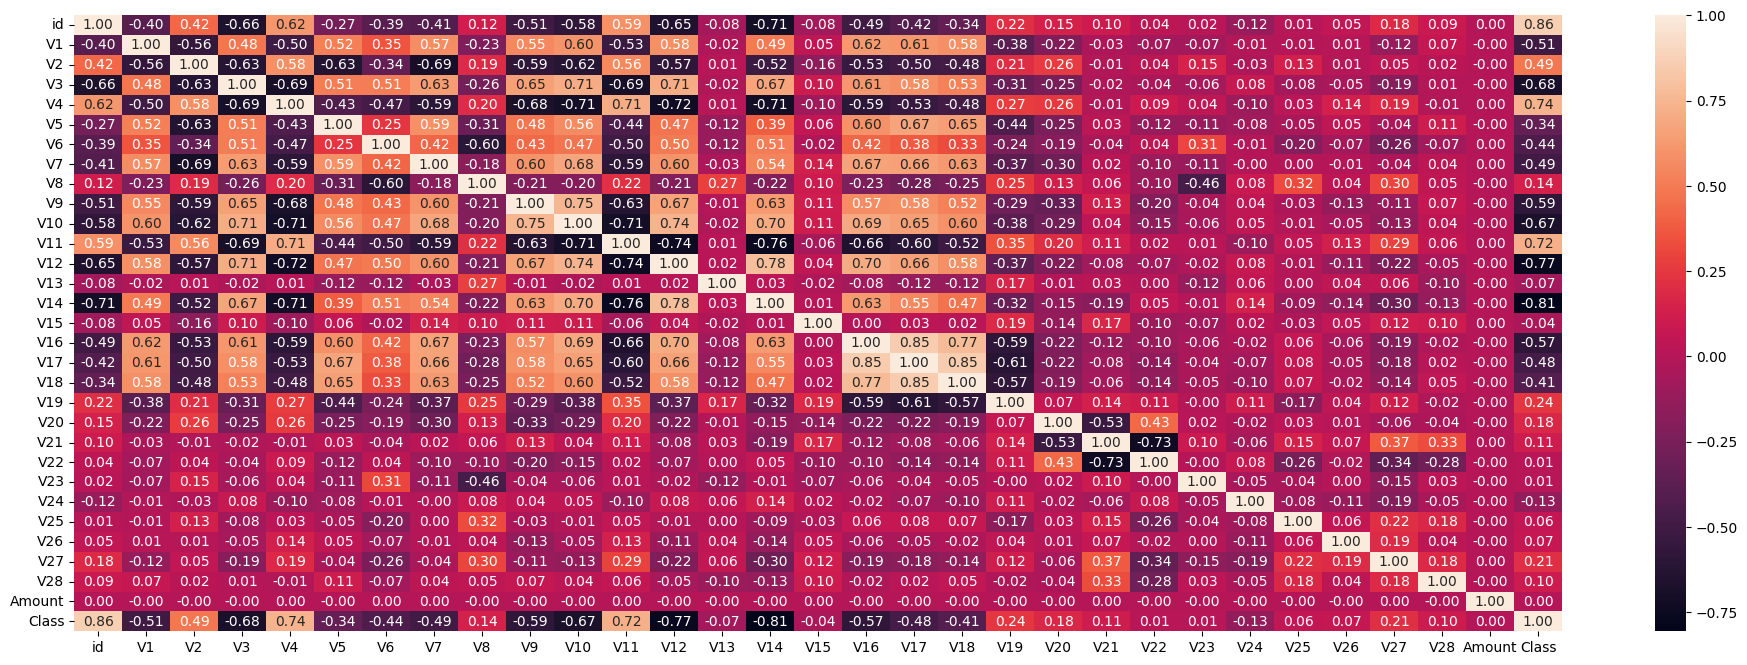

In [11]:
import seaborn as sns # displaying the correlation between the features
plt.figure(figsize=(24,8))
sns.heatmap(data[col_numerical].corr(),annot =True, fmt= ".2f");

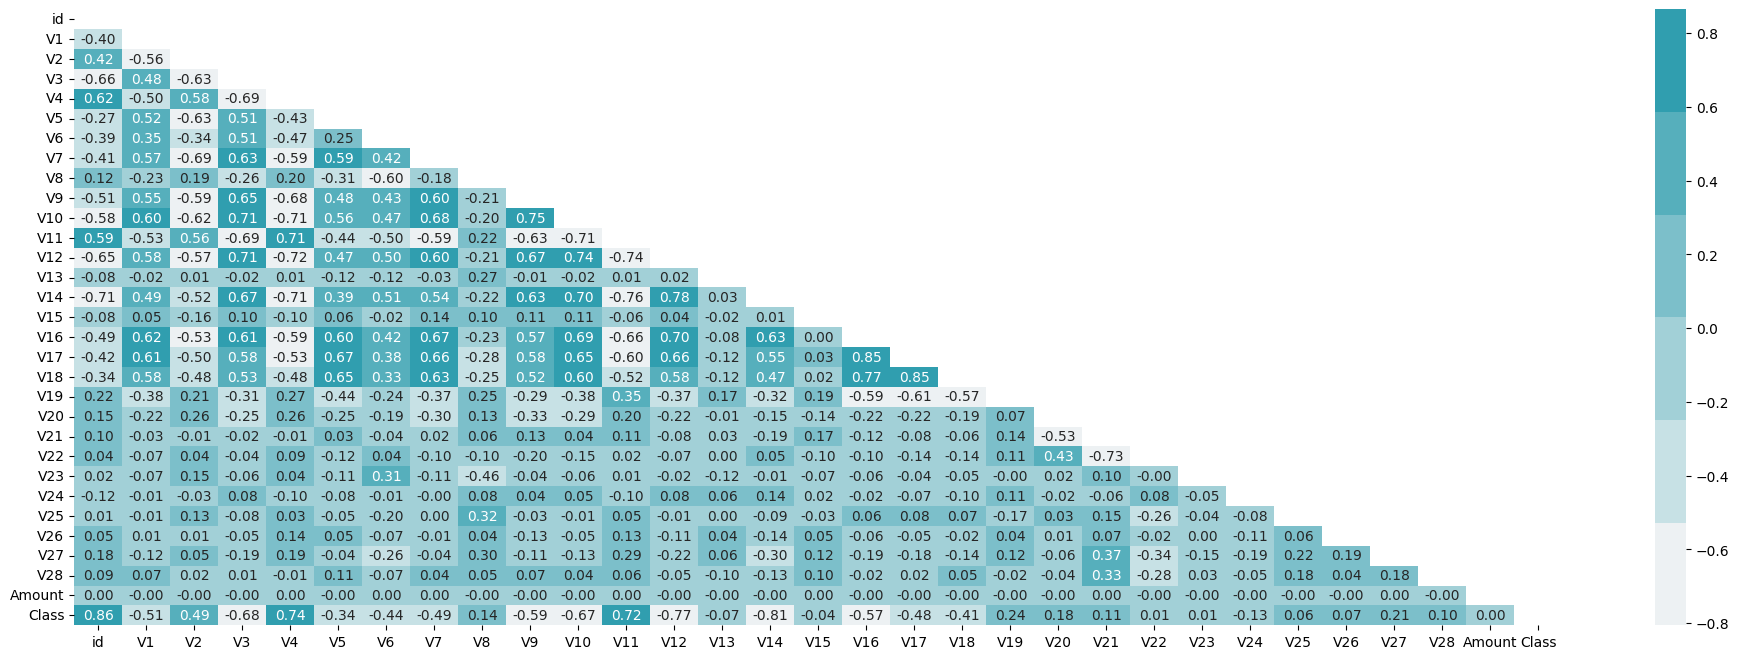

In [12]:
plt.figure(figsize=(24,8))
#  mask for the upper triangle
mask = np.zeros_like(data[col_numerical].corr(), dtype=bool)
mask[np.triu_indices_from(mask)]=True
# generate a custom diverging colormap

cmap = sns.light_palette((210,90,60), input = 'husl')

# heatmap with mask and correct aspect ratio
sns.heatmap(data[col_numerical].corr(),mask = mask, cmap = cmap, annot = True, fmt = ".2f");

# <font color = red> Training and testing datasets </font>

In [13]:
x = data1.drop(['Class'],axis = 1)
y = data1['Class'] # puting our data into input(x) and output (y) features

x.shape, y.shape # Check the shapes of our features and labels

((568630, 29), (568630,))

Oh nice!

# We now turn the data into Tensors and create train and test split

In [14]:
# Turn data into tensors to avoid issues with computations later on
import torch
x = torch.from_numpy(np.asarray(x)).type(torch.float)
y = torch.from_numpy(np.asarray(y)).type(torch.float)

# View the first five samples
x[:2], y[:2]

(tensor([[-2.6065e-01, -4.6965e-01,  2.4963e+00, -8.3724e-02,  1.2968e-01,
           7.3290e-01,  5.1901e-01, -1.3001e-01,  7.2716e-01,  6.3773e-01,
          -9.8702e-01,  2.9344e-01, -9.4139e-01,  5.4902e-01,  1.8049e+00,
           2.1560e-01,  5.1231e-01,  3.3364e-01,  1.2427e-01,  9.1202e-02,
          -1.1055e-01,  2.1761e-01, -1.3479e-01,  1.6596e-01,  1.2628e-01,
          -4.3482e-01, -8.1230e-02, -1.5105e-01,  1.7982e+04],
         [ 9.8510e-01, -3.5605e-01,  5.5806e-01, -4.2965e-01,  2.7714e-01,
           4.2860e-01,  4.0647e-01, -1.3312e-01,  3.4745e-01,  5.2981e-01,
           1.4011e-01,  1.5642e+00,  5.7407e-01,  6.2772e-01,  7.0612e-01,
           7.8919e-01,  4.0381e-01,  2.0180e-01, -3.4069e-01, -2.3398e-01,
          -1.9494e-01, -6.0576e-01,  7.9469e-02, -5.7739e-01,  1.9009e-01,
           2.9650e-01, -2.4805e-01, -6.4512e-02,  6.5314e+03]]),
 tensor([0., 0.]))

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =  train_test_split(x,y , test_size = 0.3,
                                                 random_state=42)

In [16]:
len(xtrain), len(xtest), len(ytrain), len(ytest)

(398041, 170589, 398041, 170589)

wonderful!
Now time to build the model

But befoere then let choose a device type to run our code on. either cpu ,GPU or TPU etc.

In [17]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [18]:

import torch
class LogisticRegression(torch.nn.Module):
  def __init__(self):
    super(LogisticRegression, self).__init__()
    self.layer_1 = torch.nn.Linear(in_features=29,out_features=60)
    self.layer_2 = torch.nn.Linear(in_features=60,out_features=10)
    self.layer_3 = torch.nn.Linear(in_features=10,out_features=5)
    self.layer_4 = torch.nn.Linear(in_features=5,out_features=1)
    #self.layer_5 = torch.nn.Linear(in_features=5,out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    #outputs = self.layer_2(self.layer_1(x))
    outputs = self.layer_4(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))))
    return outputs

model_1 =LogisticRegression().to(device)
model_1

LogisticRegression(
  (layer_1): Linear(in_features=29, out_features=60, bias=True)
  (layer_2): Linear(in_features=60, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=5, bias=True)
  (layer_4): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)

In [19]:
# Replicate LogisticRegression with nn.Sequential

# model_0 = nn.Sequential(
#     nn.Linear(in_features=30, out_features=60),
#     nn.Linear(in_features=60, out_features=10),
#     nn.Linear(in_features=10, out_features=5),
#     nn.Linear(in_features=5, out_features=1)
# ).to(device)

# model_0

In [20]:
# Make predictions with the model
untrained_preds = model_1(xtest.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(ytest)}, Shape: {ytest.shape}")
print(f"\nFirst 11 predictions:\n{untrained_preds[:11]}")
print(f"\nFirst 11 test labels:\n{ytest[:11]}")

Length of predictions: 170589, Shape: torch.Size([170589, 1])
Length of test samples: 170589, Shape: torch.Size([170589])

First 11 predictions:
tensor([[-40.0458],
        [-56.8785],
        [-24.3819],
        [-88.9376],
        [-88.1367],
        [-58.3252],
        [-99.6785],
        [-11.9745],
        [-97.8277],
        [-51.0011],
        [-15.1367]], device='cuda:0', grad_fn=<SliceBackward0>)

First 11 test labels:
tensor([1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.])


# Setting up loss function and optimizer

In [21]:
loss_fnn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# creating optimizer
optimizer = torch.optim.Adam(params = model_1.parameters(),
                             lr = 0.001)

In [22]:
def accuracy_fnn(ytrue, y_pred):
  correct = torch.eq(ytrue, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct/len(y_pred))*100

  return acc

# Training the model

In [23]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_1(xtest.to(device))[:5]
y_logits

tensor([[-40.0458],
        [-56.8785],
        [-24.3819],
        [-88.9376],
        [-88.1367]], device='cuda:0', grad_fn=<SliceBackward0>)

In [24]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[4.0581e-18],
        [1.9859e-25],
        [2.5767e-11],
        [0.0000e+00],
        [5.2808e-39]], device='cuda:0', grad_fn=<SigmoidBackward0>)

# Building a training and testing loop

In [30]:
torch.manual_seed(42)

epochs = 2000 # setting the number of epochs

train_loss_values = []
test_loss_values = []
train_accuracy_values = []
test_accuracy_values =[]
epoch_count = []

xtrain, ytrain = xtrain.to(device),ytrain.to(device)
xtest, ytest = xtest.to(device), ytest.to(device)
# Buildin the training and evaluation

for epoch in range(epochs):
  model_1.train()
# 1. Forward pass (model outputs raw logits)
  y_logits = model_1(xtrain).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
  loss = loss_fnn(y_logits, ytrain)
  training_acc = accuracy_fnn(ytrue = ytrain, y_pred=y_pred)
  #testing_acc = accuracy_fnn(y)

  optimizer.zero_grad() # 3. Optimizer zero grad

  loss.backward() # 4. Loss backwards

    # 5. Optimizer step
  optimizer.step()

    ### Testing

  model_1.eval()
  with torch.inference_mode():
        # 1. Forward pass
    test_logits = model_1(xtest).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
    test_loss = loss_fnn(test_logits,ytest)
    test_acc = accuracy_fnn(ytrue=ytest,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
      epoch_count.append(epoch)
      #train_loss_values.append(loss.detach().numpy())
      #test_loss_values.append(test_loss.detach().numpy())
      test_accuracy_values.append(test_acc)
      train_accuracy_values.append(training_acc)
      print(f"Epoch: {epoch} | Loss: {loss:.5f},\
      Accuracy: {training_acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.16870,      Accuracy: 94.04% | Test loss: 0.16815, Test acc: 94.11%
Epoch: 100 | Loss: 0.16457,      Accuracy: 94.18% | Test loss: 0.16399, Test acc: 94.28%
Epoch: 200 | Loss: 0.16063,      Accuracy: 94.32% | Test loss: 0.16003, Test acc: 94.43%
Epoch: 300 | Loss: 0.15677,      Accuracy: 94.45% | Test loss: 0.15617, Test acc: 94.56%
Epoch: 400 | Loss: 0.15353,      Accuracy: 94.46% | Test loss: 0.15275, Test acc: 94.62%
Epoch: 500 | Loss: 0.14753,      Accuracy: 94.61% | Test loss: 0.15799, Test acc: 94.88%
Epoch: 600 | Loss: 0.14726,      Accuracy: 94.72% | Test loss: 0.14664, Test acc: 94.81%
Epoch: 700 | Loss: 0.14424,      Accuracy: 94.81% | Test loss: 0.14362, Test acc: 94.88%
Epoch: 800 | Loss: 0.14001,      Accuracy: 94.86% | Test loss: 0.13957, Test acc: 95.04%
Epoch: 900 | Loss: 0.13865,      Accuracy: 94.92% | Test loss: 0.13807, Test acc: 95.01%
Epoch: 1000 | Loss: 0.14424,      Accuracy: 94.52% | Test loss: 0.13561, Test acc: 95.07%
Epoch: 1100 | Loss: 0.

In [32]:
# # plt.plot(epoch_count,loss.detach().numpy(),label='training loss')
# plt.plot(epoch_count,test_loss.detach().numpy(),label='Test loss')
# #plt.plot(epoch,test_acc.cpu().data.numpy().argmax() ,label = 'Test loss');
# plt.title('Training and Test loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


In [33]:
# plt.plot(epoch_count,train_accuracy_values,label='training Accuracy')
# plt.plot(epoch_count,test_accuracy_values,label='Test Accuracy')
# #plt.plot(epoch,test_acc.cpu().data.numpy().argmax() ,label = 'Test loss');
# plt.title('Training and Test loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

## Making Prediction

In [31]:
# # Making predictions

# model_1.eval()
# with torch.inference_mode():
#   y_logits = model_1(xtest)
# #y_preds = torch.round(torch.sigmoid(model_1(xtest))).squeeze()
# y_logits[:5]

tensor([[ 5.4546],
        [ 5.2207],
        [-3.5349],
        [ 9.0992],
        [ 6.3118]], device='cuda:0')

In [ ]:
# plt.plot(epoch_count, train_loss_values,label = 'Train loss')
# plt.plot(epoch_count,test_loss_values, label = 'Test loss')
# plt.title('Traing and test loss curves')
# plt.ylabel('Loss')
# plt.xlabel('Epochs')
# plt.legend()

## Saving the model

In [34]:
from pathlib import Path
# create model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)
# create model save path
MODEL_NAME = "Credit_card_Fraud_detection_NN"

MODEL_SAVE_PATH =MODEL_PATH/MODEL_NAME


#3. save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')

torch.save(obj = model_1.state_dict(),# only saving the state_dict() only saves the models learned parameters
           f = MODEL_SAVE_PATH)

Saving model to: models/Credit_card_Fraud_detection_NN
